# regression 실습

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(2)

In [ ]:
# 합성 데이터 생성
training_x = np.array(list(range(20)), dtype=float)
noise = np.array(list(np.random.randint(-5, 5, 20)), dtype=float)
training_y = np.array(list(range(20)), dtype=float) + noise

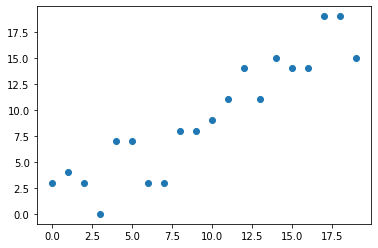

In [ ]:
plt.scatter(training_x, training_y)
plt.show()

In [ ]:
class h:    # 모델 h 클래스
  def __init__(self):
    self.theta1 = np.random.random([1])
    self.theta0 = np.random.random([1])

  def predict(self, x):
    y_hat = self.theta1 * x + self.theta0
    return y_hat    # w * x + b

  def train_model(self, lr, input_x, input_y, epochs):
    cost_list = []

    for _ in range(epochs):
      # cost 계산
      predicted_y = self.predict(input_x)
      cost = mse(input_y, predicted_y)
      
      # gradients 계산
      grad_theta0 = np.mean(predicted_y - input_y)
      grad_theta1 = np.mean((predicted_y - input_y) * input_x)
      cost_list.append(cost)
      self.theta0 -= lr * grad_theta0
      self.theta1 -= lr * grad_theta1
      
    plt.plot(range(len(cost_list)), cost_list)
    plt.xlabel('epoch')
    plt.ylabel('cost value')
    plt.title('Training')
    plt.show()


In [ ]:
def mse(y, y_hat):      # cost function
  return 0.5 * np.mean((y.flatten() - y_hat.flatten()) ** 2)

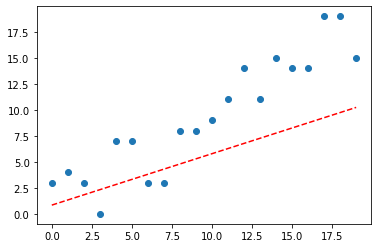

In [ ]:
model = h() # 모델 생성

plt.plot(np.arange(20), model.predict(np.arange(20)), 'r--')
plt.scatter(training_x, training_y)
plt.show()

In [ ]:
# cost 계산
cost = mse(training_y, model.predict(training_x))

cost

12.107682559258807

In [ ]:
# gradients 계산
predicted_y =  model.predict(training_x)
grad_theta0 = np.mean(predicted_y - training_y)
grad_theta1 = np.mean((predicted_y - training_y) * training_x)
print(grad_theta0)
print(grad_theta1)

-3.8081885595142184
-49.119416472435965


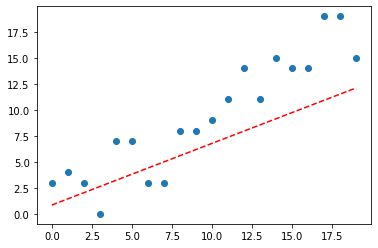

In [ ]:
learning_rate = 0.002

model.theta0 -= learning_rate * grad_theta0
model.theta1 -= learning_rate * grad_theta1

plt.plot(np.arange(20), model.predict(np.arange(20)), 'r--')
plt.scatter(training_x, training_y)
plt.show()

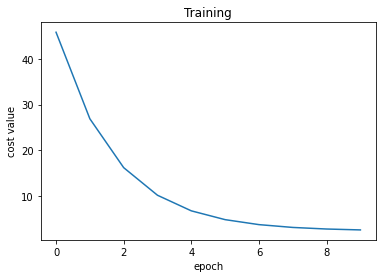

In [ ]:
model = h()

model.train_model(learning_rate, training_x, training_y, 10)

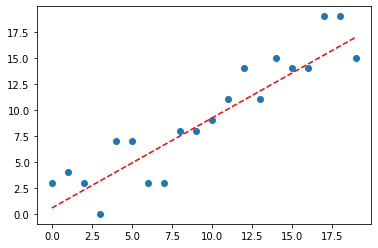

In [ ]:
# 학습이 완료된 linear function을 실행
plt.plot(np.arange(20), model.predict(np.arange(20)), 'r--')
plt.scatter(training_x, training_y)
plt.show()

In [ ]:
print(model.theta0, model.theta1)

[0.56789169] [0.86526303]


## 실제 데이터를 이용한 regression



### Single Variable

In [ ]:
from sklearn import datasets
import pandas as pd
import seaborn as sns

dataset = datasets.load_boston()
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
print(dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
bostons = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])

bostons

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
data_num = 100

In [ ]:
dataset['target'][:data_num] # Median value of owner-occupied homes in $1000's

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2])

In [ ]:
bostons['target'] = dataset['target']

In [ ]:
bostons.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


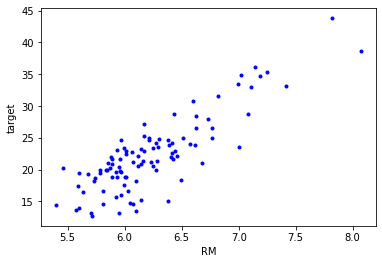

In [ ]:
plt.plot('RM', 'target', 'b.', data=bostons.iloc[:data_num])
plt.xlabel('RM')
plt.ylabel('target')
plt.show()

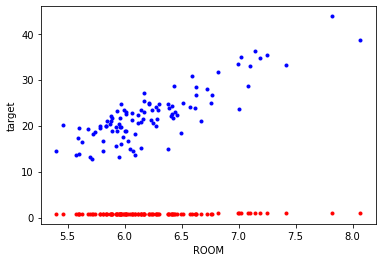

In [ ]:
linear_model = h()

bostons = bostons.iloc[:data_num]
bostons_X = bostons['RM'].values
bostons_Y = bostons['target'].values

plt.plot(bostons_X, linear_model.predict(bostons_X), 'r.')
plt.plot(bostons_X, bostons_Y, 'b.')
plt.xlabel('ROOM')
plt.ylabel('target')
plt.show()

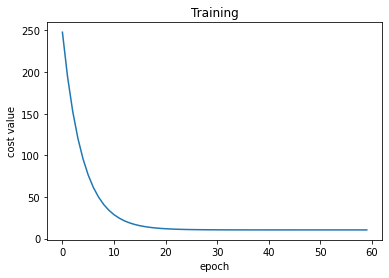

In [ ]:
learning_rate = 0.003
epochs = 60

linear_model.train_model(lr=learning_rate, input_x=bostons_X, input_y=bostons_Y, epochs=epochs)

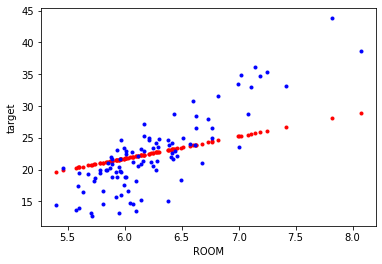

In [ ]:

plt.plot(bostons_X, linear_model.predict(bostons_X), 'r.')
plt.plot(bostons_X, bostons_Y, 'b.')
plt.xlabel('ROOM')
plt.ylabel('target')
plt.show()

In [ ]:
print(linear_model.theta0, linear_model.theta1, sep='\n')

[0.92429675]
[3.4689219]


In [ ]:
mse(bostons_Y, linear_model.predict(bostons_X))

10.400334809026083

### Multiple Variables

In [ ]:
class improved_h:
  def __init__(self, n):
    self.theta = np.random.random([n + 1, 1])     # with bias

  def __call__(self, x):
    return x @ self.theta 

  def train_model(self, lr, input_x, input_y, epochs):
    cost_list = []

    for _ in range(epochs):
      # cost 계산
      predicted_y = self(input_x)
      cost = mse(input_y.reshape(-1), predicted_y)
      
      # gradients 계산
      grad_theta = np.mean((predicted_y - input_y.reshape(-1, 1)) * input_x, axis=0)
      cost_list.append(cost)

      self.theta -= lr * grad_theta.reshape(-1, 1)
      
    plt.plot(range(len(cost_list)), cost_list)
    plt.xlabel('epoch')
    plt.ylabel('cost value')
    plt.title('Training')
    plt.show()

In [ ]:
bostons.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
imporved_model = improved_h(2)  # 모델 생성
bostons_X = bostons[['RM', 'LSTAT']].values    # target 제외
print(bostons_X[:5])

[[6.575 4.98 ]
 [6.421 9.14 ]
 [7.185 4.03 ]
 [6.998 2.94 ]
 [7.147 5.33 ]]


In [ ]:
bostons_X_with_one = np.hstack((np.ones((data_num, 1)), bostons_X))
bostons_X_with_one = bostons_X_with_one.astype(np.float32)

print(bostons_X_with_one.shape, bostons_X_with_one.dtype)
print(bostons_X_with_one[0])

(100, 3) float32
[1.    6.575 4.98 ]


In [ ]:
imporved_model(bostons_X_with_one).shape

(100, 1)

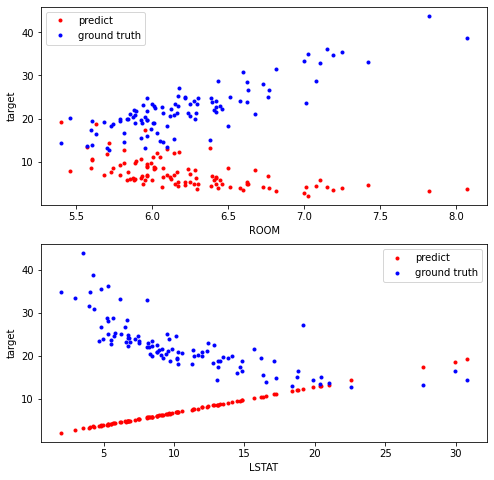

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(211)
plt.plot(bostons_X[:, 0], imporved_model(bostons_X_with_one), 'r.', label='predict') 
plt.plot(bostons_X[:, 0], bostons_Y, 'b.', label='ground truth')

plt.legend()
plt.xlabel('ROOM')
plt.ylabel('target')

plt.subplot(212)
plt.plot(bostons_X[:, 1], imporved_model(bostons_X_with_one), 'r.', label='predict') 
plt.plot(bostons_X[:, 1], bostons_Y, 'b.', label='ground truth')

plt.legend()
plt.xlabel('LSTAT')
plt.ylabel('target')
plt.show()

In [ ]:
mse(imporved_model(bostons_X_with_one), bostons_Y)

149.90064641240232

In [ ]:
grad_theta = np.mean((imporved_model(bostons_X_with_one) - bostons_Y.reshape(-1, 1)) * bostons_X_with_one, axis=0)

grad_theta

array([ -14.99102413,  -96.87579743, -117.63250362])

In [ ]:
imporved_model.theta

array([[0.09653092],
       [0.12715997],
       [0.59674531]])

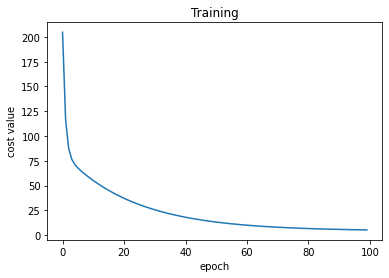

In [ ]:
imporved_model = improved_h(2)
imporved_model.train_model(0.0025, bostons_X_with_one, bostons_Y, 100)

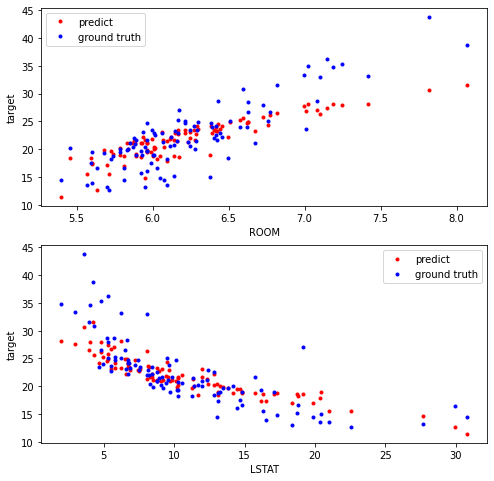

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(211)
plt.plot(bostons_X[:, 0], imporved_model(bostons_X_with_one), 'r.', label='predict') 
plt.plot(bostons_X[:, 0], bostons_Y, 'b.', label='ground truth')

plt.legend()
plt.xlabel('ROOM')
plt.ylabel('target')

plt.subplot(212)
plt.plot(bostons_X[:, 1], imporved_model(bostons_X_with_one), 'r.', label='predict') 
plt.plot(bostons_X[:, 1], bostons_Y, 'b.', label='ground truth')

plt.legend()
plt.xlabel('LSTAT')
plt.ylabel('target')
plt.show()

In [ ]:
mse(imporved_model(bostons_X_with_one), bostons_Y)

5.263865080932886

### Polynomial regression

In [ ]:
bostons_X = bostons[['RM']].values

# feature scaling
max_val = np.max(bostons_X, axis=0, keepdims=True)
min_val = np.min(bostons_X, axis=0, keepdims=True)

scaled_bostons_X = (bostons_X - min_val) /(max_val - min_val)

bostons_X_poly = np.hstack([scaled_bostons_X, scaled_bostons_X ** 2, scaled_bostons_X ** 3])
bostons_X_poly.shape

(100, 3)

In [ ]:
bostons_X_poly[:5, :]

array([[0.44044944, 0.19399571, 0.0854453 ],
       [0.38277154, 0.14651405, 0.05608141],
       [0.66891386, 0.44744575, 0.29930266],
       [0.5988764 , 0.35865295, 0.21478879],
       [0.65468165, 0.42860806, 0.28060183]])

In [ ]:
bostons_X_poly = np.hstack([np.ones((len(bostons_X_poly), 1)), bostons_X_poly])
bostons_X_poly[:5, :]

array([[1.        , 0.44044944, 0.19399571, 0.0854453 ],
       [1.        , 0.38277154, 0.14651405, 0.05608141],
       [1.        , 0.66891386, 0.44744575, 0.29930266],
       [1.        , 0.5988764 , 0.35865295, 0.21478879],
       [1.        , 0.65468165, 0.42860806, 0.28060183]])

In [ ]:
poly_model = improved_h(bostons_X_poly.shape[1] - 1)  # 모델 생성

poly_model(bostons_X_poly).shape

(100, 1)

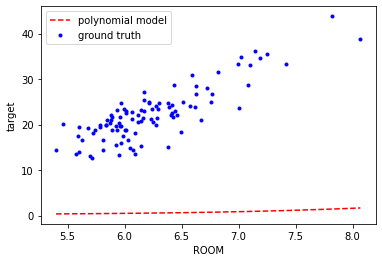

In [ ]:
order = np.reshape(np.argsort(bostons_X, axis=0), -1)

plt.plot(bostons_X[order], 
         poly_model(bostons_X_poly)[order], 'r--', label='polynomial model')
plt.plot(bostons_X, bostons_Y, 'b.', label='ground truth')
plt.xlabel('ROOM')
plt.ylabel('target')
plt.legend()
plt.show()

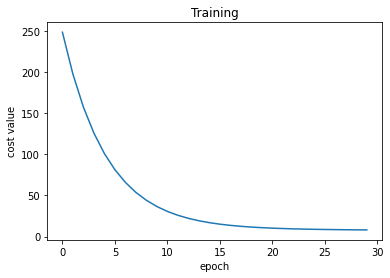

In [ ]:
poly_model = improved_h(bostons_X_poly.shape[1] - 1)  # 모델 생성
poly_model.train_model( lr=0.1, input_x= bostons_X_poly, input_y=bostons_Y, epochs=30)

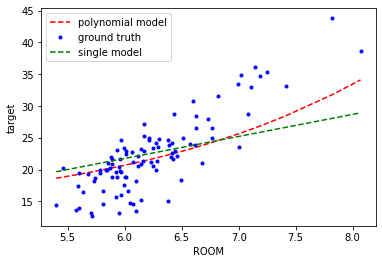

In [ ]:
plt.plot(bostons_X[order], 
         poly_model(bostons_X_poly)[order], 'r--', label='polynomial model')
plt.plot(bostons_X, bostons_Y, 'b.', label='ground truth')
plt.plot(bostons_X[order], linear_model.predict(bostons_X)[order], 'g--', label='single model')
plt.xlabel('ROOM')
plt.ylabel('target')
plt.legend()
plt.show()

### linear regression with sklearn library

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(bostons_X, bostons_Y)

reg.coef_, reg.intercept_

(array([10.2234634]), -41.42826246618968)

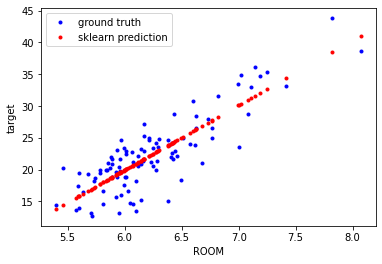

In [ ]:
plt.plot(bostons_X, bostons_Y, 'b.', label='ground truth')
plt.plot(bostons_X, reg.predict(bostons_X), 'r.', label='sklearn prediction')
plt.xlabel('ROOM')
plt.ylabel('target')
plt.legend()
plt.show()

In [ ]:
reg = LinearRegression().fit(bostons_X_with_one, bostons_Y)

reg.coef_

array([ 0.        ,  7.5538054 , -0.37714434], dtype=float32)

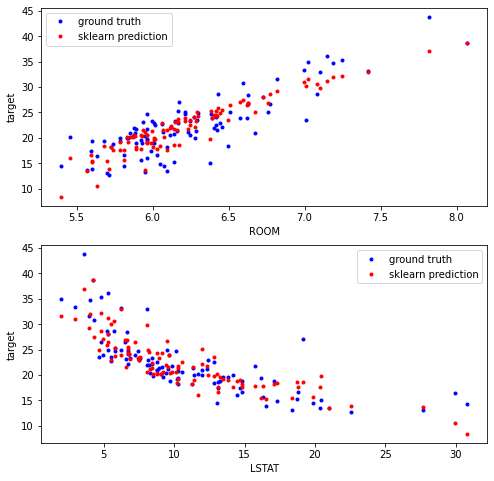

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(211)

plt.plot(bostons_X, bostons_Y, 'b.', label='ground truth')
plt.plot(bostons_X, reg.predict(bostons_X_with_one), 'r.', label='sklearn prediction')
plt.xlabel('ROOM')
plt.ylabel('target')
plt.legend()

plt.subplot(212)
plt.plot(bostons['LSTAT'], bostons_Y, 'b.', label='ground truth')
plt.plot(bostons['LSTAT'], reg.predict(bostons_X_with_one), 'r.', label='sklearn prediction')
plt.xlabel('LSTAT')
plt.ylabel('target')

plt.legend()
plt.show()

In [ ]:
reg = LinearRegression().fit(bostons_X_poly, bostons_Y)
reg.coef_

array([  0.        ,   3.75161342,  50.97131481, -29.64021757])

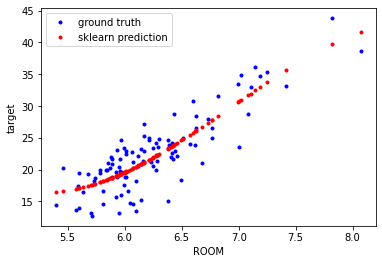

In [ ]:
plt.plot(bostons_X, bostons_Y, 'b.', label='ground truth')
plt.plot(bostons_X, reg.predict(bostons_X_poly), 'r.', label='sklearn prediction')
plt.xlabel('ROOM')
plt.ylabel('target')
plt.legend()
plt.show()

## TensorFlow 를 이용한 Regression

Multiple Variables 에 대한 linear regression 수행

In [ ]:
import tensorflow as tf
bostons.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
trainX = bostons[['RM','LSTAT']].values
trainY = bostons['target'].values

In [ ]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Input(shape=[len(trainX[0])]),
     tf.keras.layers.Dense(1, activation='linear')
    ]
)

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.0005),  # Optimizer
    # Loss function to minimize
    loss=tf.keras.losses.MeanSquaredError(),
    # List of metrics to monitor
    metrics=[tf.keras.metrics.MeanSquaredError()],
)

In [ ]:
history = model.fit(
    trainX,
    trainY,
    epochs=100
)

Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 173.1725 - mean_squared_error: 173.1725
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 148.2047 - mean_squared_error: 148.2047
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 136.8024 - mean_squared_error: 136.8024
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 112.8312 - mean_squared_error: 112.8312
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 109.3405 - mean_squared_error: 109.3405
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 107.1302 - mean_squared_error: 107.1302
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 103.6695 - mean_squared_error: 103.6695
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 98.2362 - mean_squared_error: 98.2362
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 88.6936 - mean_squared_error: 88.6936
Epoch

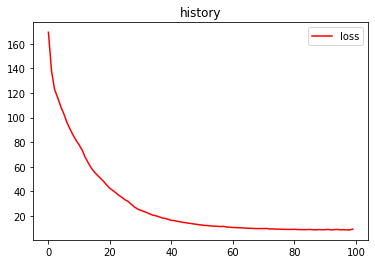

In [ ]:
plt.title('history')
plt.plot(range(100), history.history['loss'], 'r', label='loss')
plt.legend()
plt.show()


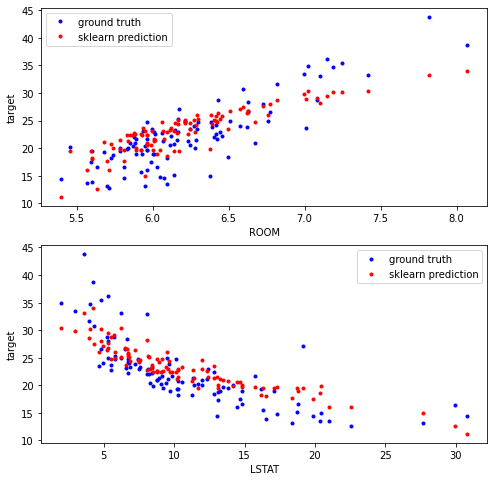

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(211)

plt.plot(trainX[:, 0], trainY, 'b.', label='ground truth')
plt.plot(trainX[:, 0], model.predict(trainX), 'r.', label='sklearn prediction')
plt.xlabel('ROOM')
plt.ylabel('target')
plt.legend()

plt.subplot(212)
plt.plot(trainX[:, 1], trainY, 'b.', label='ground truth')
plt.plot(trainX[:, 1], model.predict(trainX), 'r.', label='sklearn prediction')
plt.xlabel('LSTAT')
plt.ylabel('target')

plt.legend()
plt.show()

# regression 문제


다음과 같은 examples `data_x` 와 `data_y`가 존재합니다.

```python
  rg = np.random.default_rng(1)
  data_x = 10 * rg.random((100, 1))
  noise = 50 * rg.random((100, 1))
  data_y = (data_x ** 2 + noise)
```

1. `data_x` 와 `data_y` 에 대하여 plotting 해보세요.
2. 주어진 training examples에 대한 linear regression 을 수행하세요.
3. 주어진 training examples에 대한 polynomial regression 을 수행하세요.



In [ ]:
rg = np.random.default_rng(1)
data_x = 10 * rg.random((100, 1))
noise = 50 * rg.random((100, 1))
data_y = (data_x ** 2 + noise)

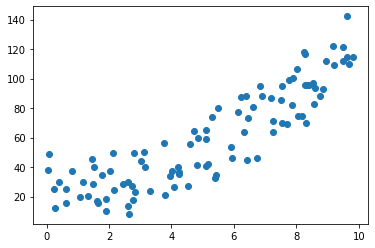

In [ ]:
plt.scatter(data_x, data_y)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(data_x, data_y)

reg.coef_

array([[10.08025292]])

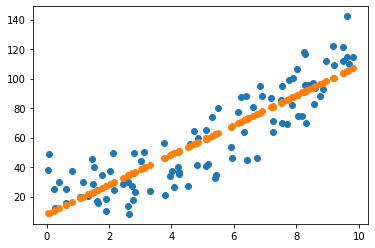

In [ ]:
plt.scatter(data_x, data_y)
plt.scatter(data_x, reg.predict(data_x))

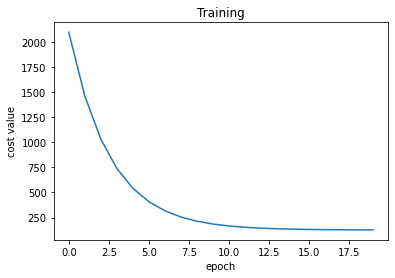

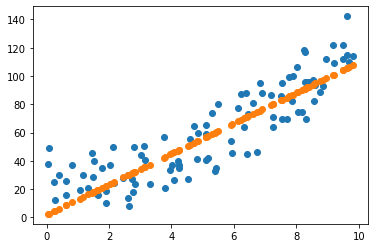

In [ ]:
sample_model = h()

sample_model.train_model(0.005, data_x, data_y, 20)

plt.scatter(data_x, data_y)
plt.scatter(data_x, sample_model.predict(data_x))
plt.show()